# Critical Flicker Frequency (CFF), and Eye Color

There is various flickering light in our environment; for instance, light from computer screens and fluorescent bulbs. If the frequency of the flicker is below a certain threshold, the flicker can be detected by the eye. Different people have slightly different flicker "threshold" frequencies (known as the critical flicker frequency, or CFF). Knowing the critical threshold frequency below which flicker is detected can be important for product manufacturing as well as tests for ocular disease. Do people with different eye color have different threshold flicker sensitivity? A 1973 study This link opens in a new tab ("The Effect of Iris Color on Critical Flicker Frequency," Journal of General Psychology [1973], 91–95) obtained the following data from a random sample of 19 subjects.

Do these data suggest that people with different eye color have different threshold sensitivity to flickering light? In other words, do the data suggest that threshold sensitivity to flickering light is related to eye color?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
flicker = pd.read_excel('flicker.xls')

In [3]:
flicker.describe()

,CFF,Blue,Brown,Green
count,19.000000,6.000000,8.000000,5.000000
mean,26.752632,28.166667,25.587500,26.920000
std,1.845526,1.527962,1.365323,1.843095
min,23.700000,25.700000,23.700000,24.200000
25%,25.350000,27.475000,24.725000,26.400000
50%,26.800000,28.400000,25.350000,26.900000
75%,28.150000,29.175000,26.425000,28.000000
max,29.900000,29.900000,27.900000,29.100000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1069a4048>,
      dtype=object)

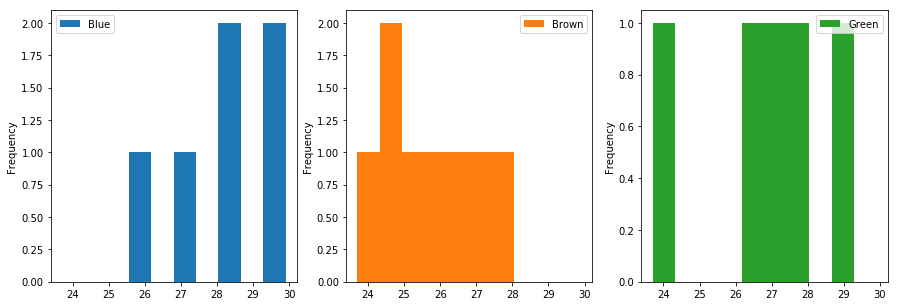

In [11]:
flicker.loc[:, 'Blue':'Green'].plot.hist(subplots=True,
                                         layout=(1, 3), 
                                         figsize=(15, 5))

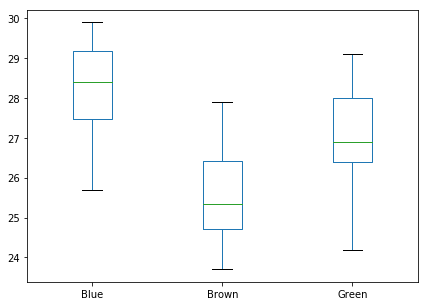

In [14]:
flicker.loc[:, 'Blue':'Green'].plot.box(figsize=(7, 5))

## Have the conditions for using ANOVA test been met?

The sample is random, and independent, assuming that there's no two colored eyes people in the sample. The plots does not show any strong tendency or outliers. And the rule of thumb regarding the standard deviation:

In [8]:
1.843095/1.365323  # green/brown

1.349933312483566

is < 2, so we can proceed with the test

## ANOVA F-Test

In [15]:
import scipy.stats as st

In [22]:
brown = flicker.Brown.dropna()
green = flicker.Green.dropna()
blue = flicker.Blue.dropna()
st.f_oneway(brown, green, blue)

F_onewayResult(statistic=4.802346136941867, pvalue=0.023248951722088834)

## Conclusion

As the values shows 4.80 is quite high, and p-value of 0.02 is low, in other words, not statistically significant, the difference in the means is not caused by sampling variation. Considering 5% significance test we can reject the null hypothesis and conclude that CFF values varies according to eye color.